In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

File a):

Read the data


Plot 2d profile time series of units 50163d and 554f2d, using e.g. “contourf” (see attached example plot).


In [2]:
df = pd.read_csv("data/tsticks.log"
                 ,delimiter = ", "
                 , comment = "#"
                ,names = ["module","HEX ID","timestamp","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8"]
                )
#module,HEX ID,timestamp,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8

/var/folders/tn/jn9dcwbs4b947qcv03hznrn00000gn/T/ipykernel_12720/11110440.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("data/tsticks.log"


--------

In [28]:
def return_date(string):
    string = string.replace("T", " " )
    string = string.replace("Z", "" )
    date = datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
    return date

def change_date(row):
    row["timestamp"] = row["timestamp"].replace("T", " " )
    row["timestamp"] = row["timestamp"].replace("Z", "" )
    date = datetime.strptime(row["timestamp"], '%Y-%m-%d %H:%M:%S')
    return date

def return_time_diff(row):
    date1 = "2023-01-13T16:30:16Z" #Initialization time
    date2 = "2023-01-17T15:01:19Z" #first timestamp
    first_time = return_date(date2)
    later_time = row["time"]
    difference = later_time - first_time
    seconds_in_day = 24 * 60 * 60
    min_sec = divmod(difference.days * seconds_in_day + difference.seconds, 60)
    return min_sec[0]*60+min_sec[1]

In [4]:
df['time_diff'] = df.apply(return_time_diff, axis=1)
df['time'] = df.apply(change_date, axis=1)

------

/var/folders/tn/jn9dcwbs4b947qcv03hznrn00000gn/T/ipykernel_12720/1552804819.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels)
/var/folders/tn/jn9dcwbs4b947qcv03hznrn00000gn/T/ipykernel_12720/1552804819.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(labels)


Text(0, 0.5, 'Temperature')

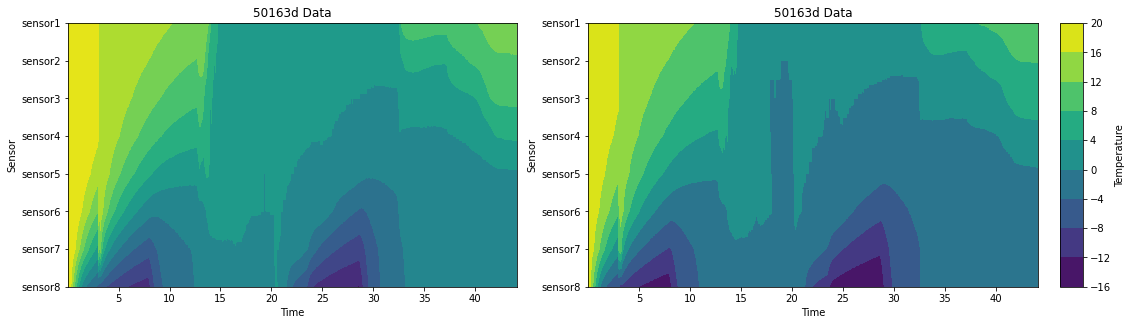

In [5]:
df_50163d = df[df["HEX ID"] == "50163d"]
df_554f2d = df[df["HEX ID"] == "554f2d"]


Z = np.array([df_50163d["sensor8"].to_numpy()
     ,df_50163d["sensor7"].to_numpy()
     ,df_50163d["sensor6"].to_numpy()
     ,df_50163d["sensor5"].to_numpy()
     ,df_50163d["sensor4"].to_numpy()
     ,df_50163d["sensor3"].to_numpy()
     ,df_50163d["sensor2"].to_numpy()
     ,df_50163d["sensor1"].to_numpy()
    ])

x = df_50163d["time_diff"]
y = np.arange(8)
X, Y = np.meshgrid(x, y)

Z2 = np.array([df_554f2d["sensor8"].to_numpy()
     ,df_554f2d["sensor7"].to_numpy()
     ,df_554f2d["sensor6"].to_numpy()
     ,df_554f2d["sensor5"].to_numpy()
     ,df_554f2d["sensor4"].to_numpy()
     ,df_554f2d["sensor3"].to_numpy()
     ,df_554f2d["sensor2"].to_numpy()
     ,df_554f2d["sensor1"].to_numpy()
    ])

x2 = df_554f2d["time_diff"]
y2 = np.arange(8)
X2, Y2 = np.meshgrid(x2, y2)

fig, ax = plt.subplots(1,2,figsize=(2*7.2,4.4),constrained_layout = True)
CS = ax[0].contourf(X/(60**2),Y,Z,10)

ax[0].set_title('50163d Data')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Sensor')
labels = [item.get_text() for item in ax[0].get_yticklabels()]
labels = ["sensor8"
          ,"sensor7"
          ,"sensor6"
          ,"sensor5"
          ,"sensor4"
          ,"sensor3"
          ,"sensor2"
          ,"sensor1"]
ax[0].set_yticklabels(labels)



CS2 = ax[1].contourf(X2/(60**2),Y2,Z2,10)

ax[1].set_title('50163d Data')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Sensor')
labels = [item.get_text() for item in ax[1].get_yticklabels()]
labels = ["sensor8"
          ,"sensor7"
          ,"sensor6"
          ,"sensor5"
          ,"sensor4"
          ,"sensor3"
          ,"sensor2"
          ,"sensor1"]
ax[1].set_yticklabels(labels)

# Make a colorbar for the ContourSet returned by the contourf call.
if False:
    axins1 = inset_axes(ax[0],
               width="5%", # width = 10% of parent_bbox width
               height="100%", # height : 50%
               loc=6,
               bbox_to_anchor=(1.05, 0., 1, 1),
               bbox_transform=ax[0].transAxes,
               borderpad=0,
           )
axins2 = inset_axes(ax[1],
           width="5%", # width = 10% of parent_bbox width
           height="100%", # height : 50%
           loc=6,
           bbox_to_anchor=(1.05, 0., 1, 1),
           bbox_transform=ax[1].transAxes,
           borderpad=0,
       )
if False:
    cbar = plt.colorbar(CS, cax=axins1)
    cbar.ax.set_ylabel('Temperature')
cbar = plt.colorbar(CS2, cax=axins2)
cbar.ax.set_ylabel('Temperature')

In [6]:
Z

array([[17.  , 17.  , 16.94, ..., -0.63, -0.69, -0.69],
       [17.  , 16.94, 17.  , ..., -0.94, -0.94, -0.94],
       [17.  , 17.  , 17.  , ..., -0.75, -0.75, -0.75],
       ...,
       [16.94, 16.94, 16.94, ...,  6.69,  6.69,  6.69],
       [16.94, 16.94, 16.94, ...,  8.69,  8.69,  8.69],
       [16.94, 16.94, 16.94, ..., 10.44, 10.44, 10.5 ]])

---
---


Files b):
1. Read the files and merge all temperature time series in an automated manner into a single array/data frame. Consider interpolation to one nominal time axis.  
2. The sensors were mounted vertically in water above a cooling plate. Plot the temperature time series of all individual sensors and combined as 2d filled contour plot (similar to a) ).
3. If you know the difference between spot and average measurements, can you determine which one is which in the files?

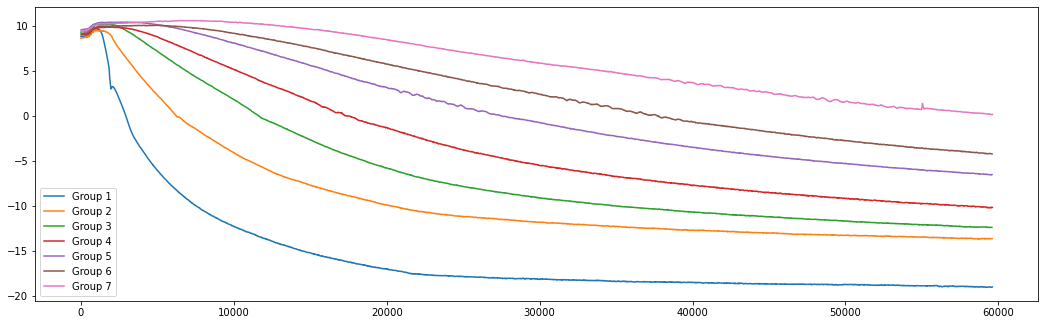

In [7]:
path = "data/tsensors_multiple_files/"
df = pd.DataFrame()
for i in np.arange(1,8):
    new_df = pd.read_csv(path+"group0"+str(i)+".log"
                     ,delimiter = ", "
                     , comment = "#"
                    ,names = ["timestamp","group","spot_meas","avg_meas"]
                    ,engine = "python"
                    )
    df = pd.concat([df,new_df],ignore_index=True)
    
df['time_diff'] = df.apply(return_time_diff, axis=1)
df['time_diff'] = df['time_diff']+17533961 #remove offset due to wrong start time

fig, ax = plt.subplots(1,1,figsize=(2*7.2,4.4),constrained_layout = True)
for i in np.arange(1,8):
    plt.plot(df[df["group"]== i]["time_diff"]
            ,df[df["group"]== i]["avg_meas"]
            ,label = f"Group {i}")
plt.legend()

/var/folders/tn/jn9dcwbs4b947qcv03hznrn00000gn/T/ipykernel_12720/2885131718.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels);


Text(0, 0.5, 'Temperature')

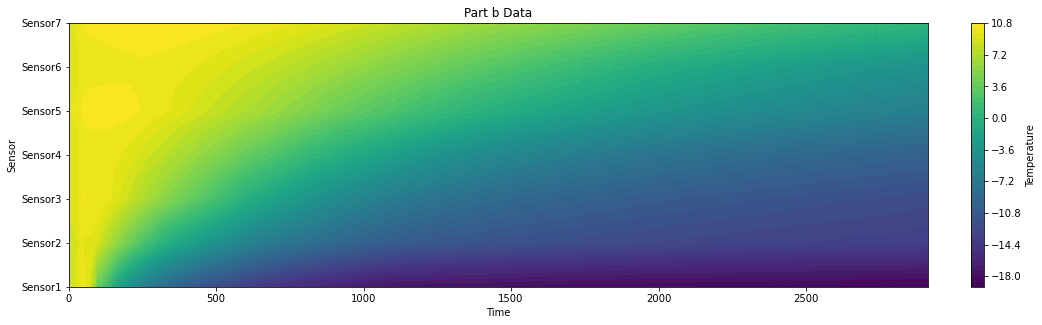

In [8]:
Z = np.array([df[df["group"]== 1]["avg_meas"].to_numpy()[0:2914]
     ,df[df["group"]== 2]["avg_meas"].to_numpy()[0:2914]
     ,df[df["group"]== 3]["avg_meas"].to_numpy()[0:2914]
     ,df[df["group"]== 4]["avg_meas"].to_numpy()[0:2914]
     ,df[df["group"]== 5]["avg_meas"].to_numpy()[0:2914]
     ,df[df["group"]== 6]["avg_meas"].to_numpy()[0:2914]
     ,df[df["group"]== 7]["avg_meas"].to_numpy()[0:2914]
    ])

x = df[df["group"]== 1]["time_diff"]
y = np.arange(1,8)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(1,1,figsize=(2*7.2,4.4),constrained_layout = True)
CS = ax.contourf(Z,50)

ax.set_title('Part b Data')
ax.set_xlabel('Time')
ax.set_ylabel('Sensor')
labels = [item.get_text() for item in ax.get_yticklabels()]
labels = ["Sensor1"
          ,"Sensor2"
          ,"Sensor3"
          ,"Sensor4"
          ,"Sensor5"
          ,"Sensor6"
          ,"Sensor7"]
ax.set_yticklabels(labels);

cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('Temperature')

In [9]:
df[df["group"]== 1]["avg_meas"].to_numpy()

array([  8.86,   8.86,   8.84, ..., -19.04, -19.04, -19.02])

<AxesSubplot:>

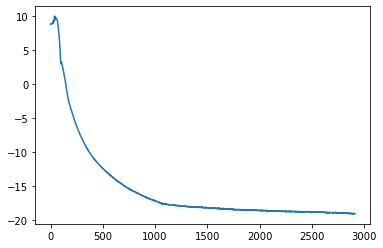

In [10]:
df[df["group"]== 1]["avg_meas"].plot()

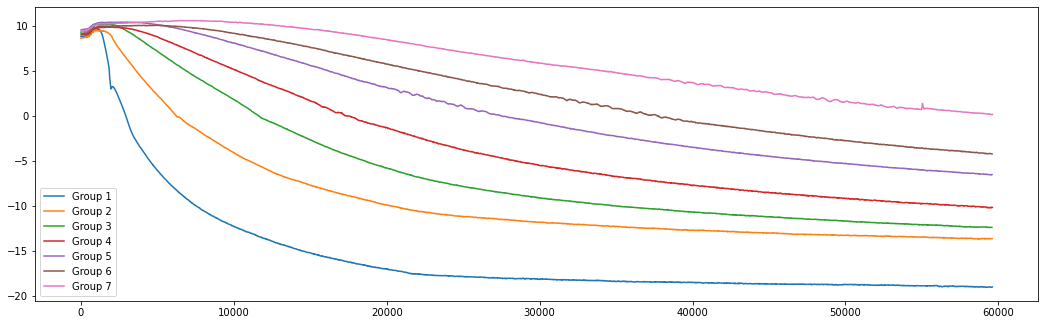

In [29]:
path = "data/tsensors_multiple_files/"
df = pd.DataFrame()
for i in np.arange(1,8):
    new_df = pd.read_csv(path+"group0"+str(i)+".log"
                     ,delimiter = ", "
                     , comment = "#"
                    ,names = ["timestamp","group","spot_meas","avg_meas"]
                    ,engine = "python"
                    )
    df = pd.concat([df,new_df],ignore_index=True)
    
df["time"] = df.apply(change_date, axis=1)
df['time_diff'] = df.apply(return_time_diff, axis=1)
df['time_diff'] = df['time_diff']+17533961 #remove offset due to wrong start time


fig, ax = plt.subplots(1,1,figsize=(2*7.2,4.4),constrained_layout = True)
for i in np.arange(1,8):
    plt.plot(df[df["group"]== i]["time_diff"]
            ,df[df["group"]== i]["avg_meas"]
            ,label = f"Group {i}")
plt.legend()

In [17]:
df = df.set_index("time_diff")

KeyError: "None of ['time_diff'] are in the columns"

In [22]:
df[df["group"]==1]["spot_meas"].interpolate(method = "time")

ValueError: time-weighted interpolation only works on Series or DataFrames with a DatetimeIndex